# ODE Solver, Euler method

Here, we will use Euler method to solve the ODE:
$$\frac{df}{dx}=g(x)$$
using:
$$f(x_f) = f(x_i) + \int_{x_i}^{x_f}{g(x)dx}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def func_1(x):
    """
    This function returns the sin function
    """
    return np.sin(x)
def func_2(x):
    """
    This function returns the sin^2 function
    """
    return np.sin(x)**2
def func_3(x):
    """
    This function returns the function x^3-2x^2+1
    """
    return x**3-2*x**2+1

In [18]:
def ode_solver_euler(function, x_start, x_end, icond, num_points):
    """
    This function solves the differential equations using the Euler method for 
    an arbitrary given function.
    Args:
        function (PyObject): Python function
        x_start (float): The start point of the interval
        x_end (float): The end point of the interval
        icond (float): The inital condition
        num_points (int): Number of points
    Returns:
        grid (numpy array): A numpy arraya containing the grid points used for solving ODE
        solution (numpy array): A numpy array containing the solution of the ODE solved using Euler method
    """
    solution = []
    grid = np.linspace(x_start, x_end, num_points)
    # Initial condition
    y_i = icond
    # Grid spacing
    h = grid[1]-grid[0]
    for i in range(grid.shape[0]-1):
        # x_i
        x_i = grid[i]
        # x_f
        x_f = grid[i+1]
        # Eq. 2: y_i + \int...
        # The integration uses the simple mid-point rule
        y_f = y_i + 0.5*(function(x_i)+function(x_f))*h
        # Appending the solution
        solution.append(y_f)
        # Setting y_i to y_f
        y_i = y_f
    
    solution = np.array(solution)
    return grid, solution

<IPython.core.display.Javascript object>


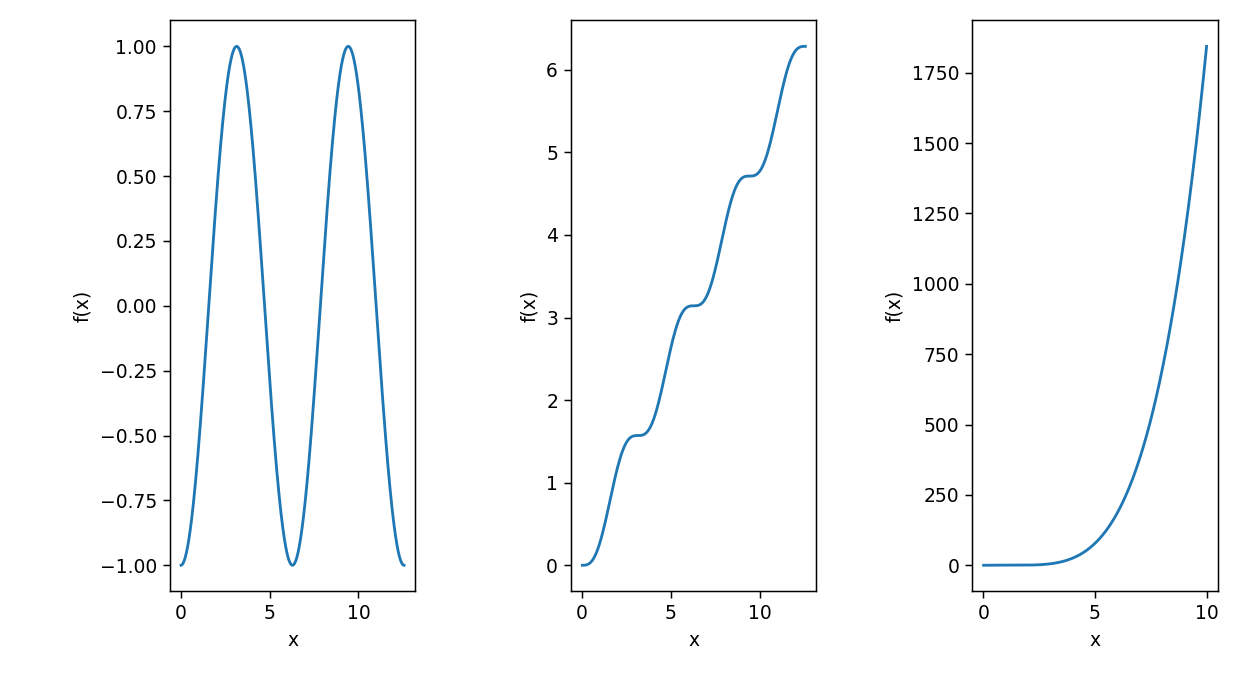

In [28]:
%matplotlib notebook
# First example
plt.subplot(1,3,1)
# Setting the initial condition to -cos(0)=-1 in order to return -cos(x)
grid, solution = ode_solver_euler(func_1, 0, 4*np.pi, -1, 1000)
plt.plot(grid[1::], solution)
plt.xlabel('x')
plt.ylabel('f(x)')
# Second example
plt.subplot(1,3,2)
# Initial condition is 0
grid, solution = ode_solver_euler(func_2, 0, 4*np.pi, 0, 1000)
plt.plot(grid[1::], solution)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.subplot(1,3,3)
# Initial condition is 0
grid, solution = ode_solver_euler(func_3, 0, 10, 0, 1000)
plt.plot(grid[1::], solution)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.tight_layout()

# Testing convergence based on the number of points

<IPython.core.display.Javascript object>


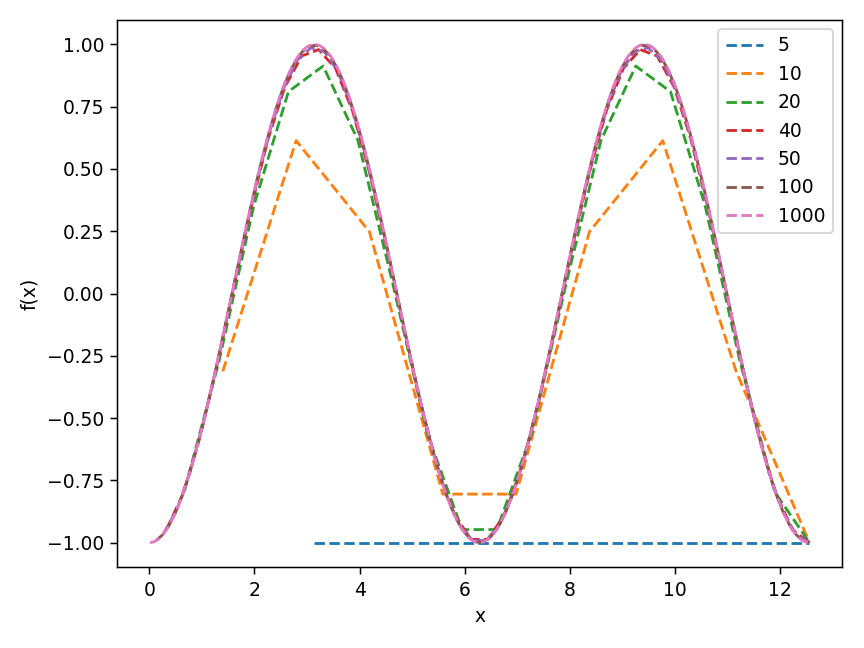

In [29]:
%matplotlib notebook
num_points = [5,10,20,40,50,100,1000]
for n in num_points:
    grid, solution = ode_solver_euler(func_1, 0, 4*np.pi, -1, n)
    plt.plot(grid[1::], solution, label=F'{n}', ls='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.tight_layout()